# 1. Import Necessary libraries

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.model_selection import KFold,train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [ ]:
wine_data  = load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
wine_data_df = pd.DataFrame(data = wine_data.data,columns = wine_data.feature_names)
wine_data_df['target'] = wine_data.target
wine_data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# 3. Data Understanding

In [ ]:
wine_data_df.shape

(178, 14)

In [ ]:
wine_data_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
wine_data_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

# 4. Model Building

In [ ]:
X = wine_data_df.drop('target',axis = 1)
y = wine_data_df[['target']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [ ]:
X_train.shape,y_train.shape

((142, 13), (142, 1))

In [ ]:
X_test.shape,y_test.shape

((36, 13), (36, 1))

# 5. Model Training || 6. Model Testing || 7. Model Evaluation

# BEFORE STANDARDIZATION

### For K= 3

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7777777777777778

### For K= 5

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7777777777777778

### For K= 7

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.75

### For K= 9

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8055555555555556

# AFTER STANDARDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)

### For K= 3

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9444444444444444

### For K= 5

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9722222222222222

### For K= 7

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9722222222222222

### For K= 9

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9722222222222222

# HOW TO CHOOSE THE OPTIMAL VALUE FOR K?

In [ ]:
cv_scores = []

for i in range(1,31,1):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    kfold = KFold(n_splits=5,shuffle=True, random_state=12)
    cross_validation_score = cross_val_score(estimator = knn_model,X = scaled_X,y=y, cv = kfold)
    cv_scores.append(cross_validation_score.mean().round(5))

In [ ]:
cv_scores

[0.96032,
 0.94349,
 0.96048,
 0.94905,
 0.9719,
 0.96603,
 0.97175,
 0.97175,
 0.96603,
 0.96603,
 0.96603,
 0.96603,
 0.97746,
 0.96603,
 0.96603,
 0.96603,
 0.96603,
 0.96032,
 0.96603,
 0.97175,
 0.98317,
 0.97746,
 0.97746,
 0.97175,
 0.97175,
 0.97175,
 0.97175,
 0.97175,
 0.96619,
 0.97746]

In [ ]:
import numpy as np
cv_scores_arr = np.array(cv_scores)
print(cv_scores_arr.mean())
print(cv_scores_arr.std())

0.9679686666666668
0.007941911496750777


In [ ]:
from matplotlib import pyplot as plt

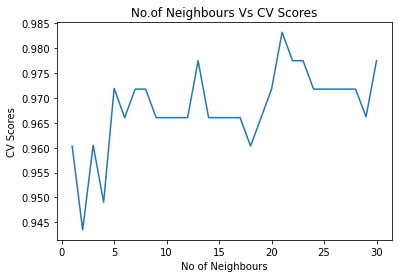

In [ ]:
plt.plot(range(1,31),cv_scores)
plt.xlabel('No of Neighbours')
plt.ylabel('CV Scores')
plt.title('No.of Neighbours Vs CV Scores')
plt.show()

In [ ]:
cv_scores.index(max(cv_scores))

20